# Árboles para Series de Tiempo
---
En muchas ocasiones los árboles no son buenos manejando las tendencia, por eso se sugiere quitar la tendencia y analizar la serie sin tendencia.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np

In [2]:
Pm25_DF = pd.read_csv("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\d-Shanghai-1317.txt",index_col=False,names=['PM25'])
Pm25_DF
Pm25_DF.size

1611

In [3]:
indice = pd.date_range(start='1/1/2013', periods=1611, freq='D')
indice
PM25ts =pd.Series(Pm25_DF['PM25'].values,index=indice)
PM25df =pd.DataFrame(Pm25_DF['PM25'].values,index=indice)
type(PM25ts)

pandas.core.series.Series

2013-01-01    78.08333
2013-01-02    58.54167
2013-01-03    45.87500
2013-01-04    49.25000
2013-01-05    52.87500
Freq: D, dtype: float64


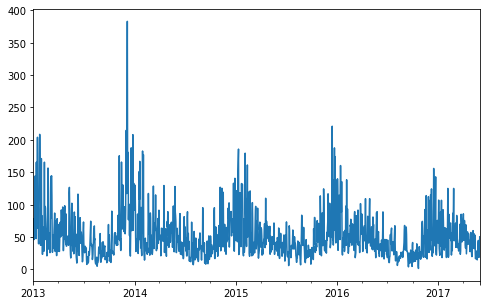

In [4]:
print(PM25ts.head(5))

PM25ts.plot(figsize=(8,5))
pyplot.show()

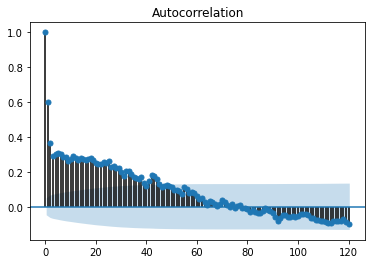

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(PM25ts,lags=120)
pyplot.show()

## Creación de variables rezagadas
---

Aquí se procede a crear las covariables y se procede seguidamente a dividir el conjuntoi de dato en entrenamiento y de prueba. 

In [14]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [15]:
for i in range(10,0,-1):
    df1[['t-'+str(i)]] = PM25df.shift(i)
    
for i in range(370,364,-1):   
    df1[['t-'+str(i)]] = PM25df.shift(i)
print(df1)

                t-10       t-9       t-8       t-7       t-6       t-5  \
2013-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2017-05-26  22.75000  23.45833  28.29167  22.33333  18.20833  14.62500   
2017-05-27  23.45833  28.29167  22.33333  18.20833  14.62500  23.29167   
2017-05-28  28.29167  22.33333  18.20833  14.62500  23.29167  18.33333   
2017-05-29  22.33333  18.20833  14.62500  23.29167  18.33333  39.87500   
2017-05-30  18.20833  14.62500  23.29167  18.33333  39.87500  44.62500   

                 t-4       t-3       t-2       t-1     t-370     t-369  \
2013-01-01       NaN       NaN       

In [16]:
# Create column t y añadiendola 
df1['t'] = PM25df.values
print(df1.head(13))

                t-10       t-9       t-8       t-7        t-6        t-5  \
2013-01-01       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-02       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-03       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-04       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-05       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-06       NaN       NaN       NaN       NaN        NaN   78.08333   
2013-01-07       NaN       NaN       NaN       NaN   78.08333   58.54167   
2013-01-08       NaN       NaN       NaN  78.08333   58.54167   45.87500   
2013-01-09       NaN       NaN  78.08333  58.54167   45.87500   49.25000   
2013-01-10       NaN  78.08333  58.54167  45.87500   49.25000   52.87500   
2013-01-11  78.08333  58.54167  45.87500  49.25000   52.87500   85.12500   
2013-01-12  58.54167  45.87500  49.25000  52.87500   85.12500  144.00000   
2013-01-13  

In [17]:
#quitando los NaN
# Create a new subsetted dataframe, removing Nans from first 370 rows
df1_PM25 = df1[370:]
print(df1_PM25)
df1_PM25.size

                 t-10        t-9        t-8        t-7        t-6        t-5  \
2014-01-06   60.29167   98.87500  132.87500  114.79170   96.45833  126.70830   
2014-01-07   98.87500  132.87500  114.79170   96.45833  126.70830   91.45833   
2014-01-08  132.87500  114.79170   96.45833  126.70830   91.45833  129.91670   
2014-01-09  114.79170   96.45833  126.70830   91.45833  129.91670   99.75000   
2014-01-10   96.45833  126.70830   91.45833  129.91670   99.75000   50.33333   
...               ...        ...        ...        ...        ...        ...   
2017-05-26   22.75000   23.45833   28.29167   22.33333   18.20833   14.62500   
2017-05-27   23.45833   28.29167   22.33333   18.20833   14.62500   23.29167   
2017-05-28   28.29167   22.33333   18.20833   14.62500   23.29167   18.33333   
2017-05-29   22.33333   18.20833   14.62500   23.29167   18.33333   39.87500   
2017-05-30   18.20833   14.62500   23.29167   18.33333   39.87500   44.62500   

                  t-4        t-3       

21097

## Partir los datos
---
Se procede a partir los datos en dos partes, uno en el conjunto donde están las covariables y otro donde se encuentra la variable a predecir.  

In [18]:
# Split data

PM25split = df1_PM25.values
# split into lagged variables and original time series
X1= PM25split[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PM25split[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [19]:
print(X1)
print(y1)

[[ 60.29167  98.875   132.875   ...  49.25     52.875    85.125  ]
 [ 98.875   132.875   114.7917  ...  52.875    85.125   144.     ]
 [132.875   114.7917   96.45833 ...  85.125   144.      122.875  ]
 ...
 [ 28.29167  22.33333  18.20833 ...  31.91667  30.66667  43.625  ]
 [ 22.33333  18.20833  14.625   ...  30.66667  43.625    56.08333]
 [ 18.20833  14.625    23.29167 ...  43.625    56.08333  58.     ]]
[27.54167 46.20833 38.91667 ... 18.75    22.875   50.20833]


In [3]:
print(X1[0]) #son los valores de las covariables que me permitirán predecir el primer valor de la vatriable original

NameError: name 'X1' is not defined

In [20]:
print(X1[1])
print(y1[1])

[ 98.875   132.875   114.7917   96.45833 126.7083   91.45833 129.9167
  99.75     50.33333  27.54167  58.54167  45.875    49.25     52.875
  85.125   144.     ]
46.20833


In [21]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.706)   # Set split, este porcentaje tan raro es para que coincida con el del ejemplo de R.
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 1241
Training Observations for Target: 876
Testing Observations for Target: 365


In [22]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.706)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]   ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 1241
Training Observations for feature: 876
Testing Observations for feature: 365


In [23]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_PM25 = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_PM25.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_PM25.score(train_feature, train_target))
print(decision_tree_PM25.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0

1.0
-0.29103322638444884


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse(with respect to predict with sample mean)). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0

In [24]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_PM25 = DecisionTreeRegressor(max_depth=d)
    decision_tree_PM25.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_PM25.score(train_feature, train_target))
    print(decision_tree_PM25.score(test_feature, test_target), '\n')  # You want the test score to be positive and high

max_depth= 2
0.3063944733896091
0.21719964017658333 

max_depth= 3
0.37349365595940176
0.2502684131276276 

max_depth= 4
0.44842330642968686
0.26509690532913033 

max_depth= 5
0.5159218993278505
0.17356829425955378 

max_depth= 7
0.6189725288040064
0.16218587454454558 

max_depth= 8
0.6629061610315549
-0.024515661118675647 

max_depth= 10
0.7696657784598931
-0.0009505345035309976 



    max_depth= 2
    0.3063944733896091     valores intramuestra
    0.21719964017658333    valores fuera de la muestra
    
No obstante el mejor valor lo está determinando max_depth= 4 con un valor de 0.26 fuera de la muestra

    max_depth= 4
    0.44842330642968686
    0.26509690532913033 

Note que el score mayor para el conjunto de prueba es para max depth =4

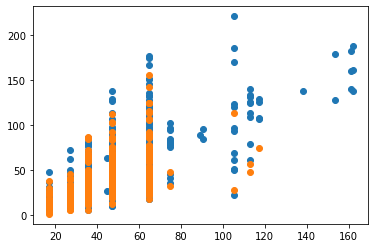

In [25]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_PM25 = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_PM25.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_PM25.predict(train_feature)
test_prediction = decision_tree_PM25.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()

In [26]:
from sklearn import tree

listacaract=list(df1_PM25.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_PM25)
print(text_representation)

|--- feature_9 <= 53.50
|   |--- feature_9 <= 34.02
|   |   |--- feature_9 <= 19.75
|   |   |   |--- feature_9 <= 14.83
|   |   |   |   |--- value: [16.72]
|   |   |   |--- feature_9 >  14.83
|   |   |   |   |--- value: [26.84]
|   |   |--- feature_9 >  19.75
|   |   |   |--- feature_5 <= 159.17
|   |   |   |   |--- value: [35.47]
|   |   |   |--- feature_5 >  159.17
|   |   |   |   |--- value: [90.35]
|   |--- feature_9 >  34.02
|   |   |--- feature_13 <= 173.77
|   |   |   |--- feature_4 <= 204.23
|   |   |   |   |--- value: [46.84]
|   |   |   |--- feature_4 >  204.23
|   |   |   |   |--- value: [138.25]
|   |   |--- feature_13 >  173.77
|   |   |   |--- feature_14 <= 88.15
|   |   |   |   |--- value: [153.58]
|   |   |   |--- feature_14 >  88.15
|   |   |   |   |--- value: [44.83]
|--- feature_9 >  53.50
|   |--- feature_10 <= 130.38
|   |   |--- feature_2 <= 176.73
|   |   |   |--- feature_9 <= 138.98
|   |   |   |   |--- value: [64.79]
|   |   |   |--- feature_9 >  138.98
|   |  

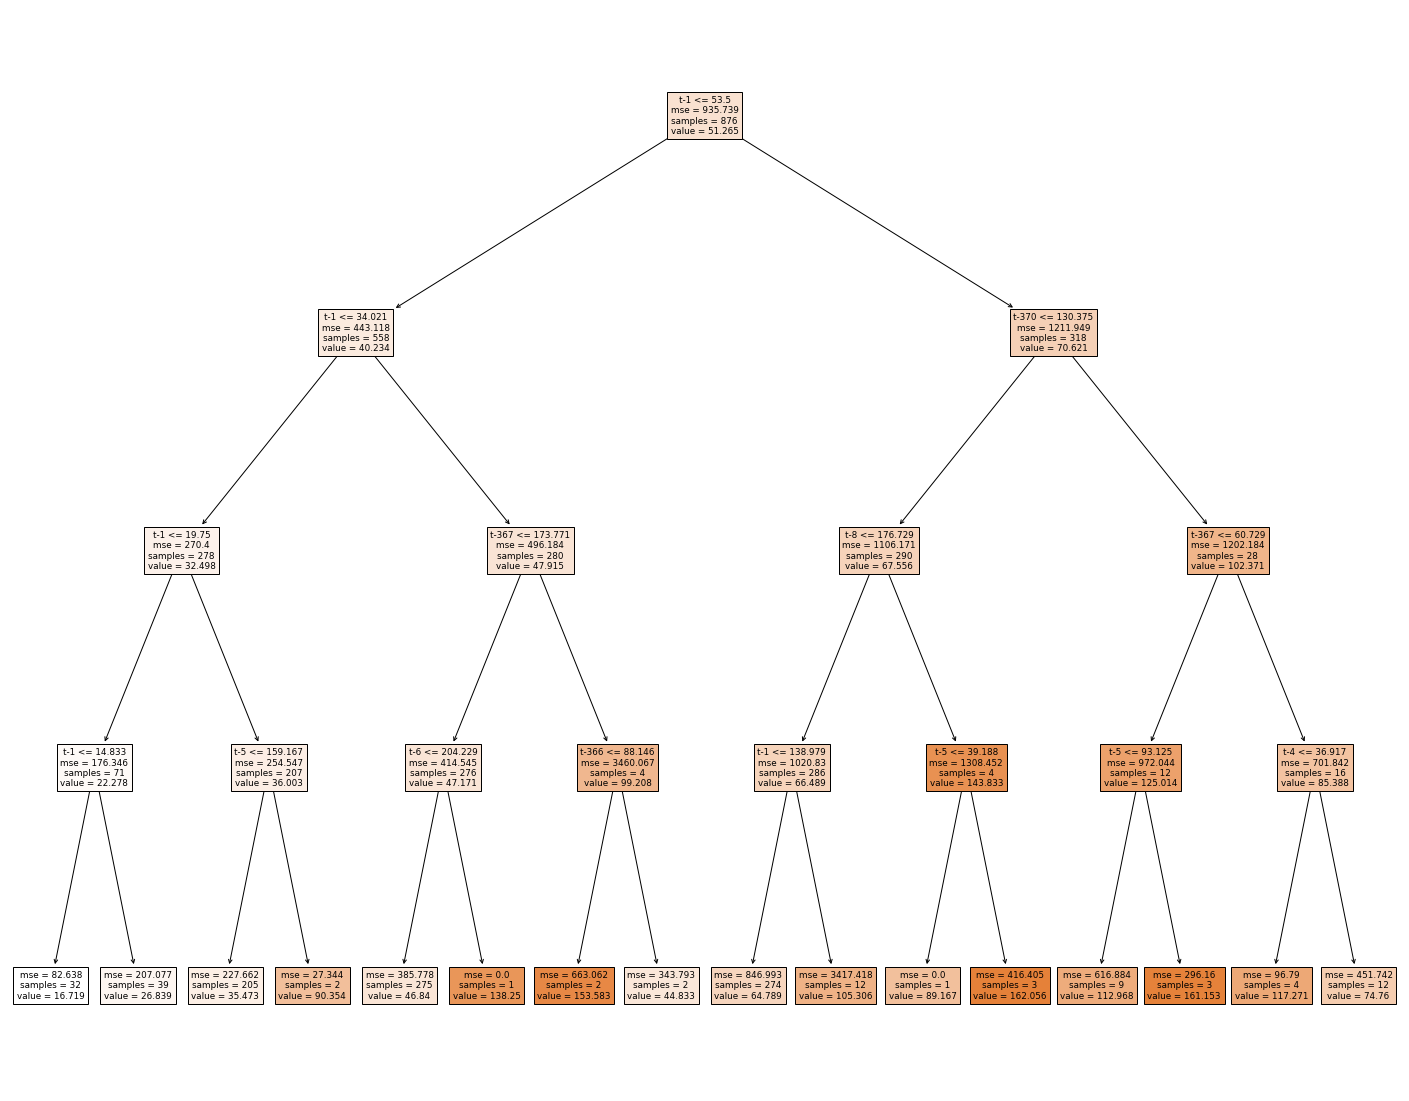

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_PM25, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronósticos.

In [28]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

876
876
365
365


In [29]:
indicetrian_test=df1_PM25.index
print(indicetrian_test.size)  ###Tamaño del índice
indicetrain=indicetrian_test[0:876]
indicetest=indicetrian_test[876:1241]

1241


In [30]:
print(indicetrain.size)
print(indicetest.size)

876
365


In [31]:
targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

1241
1241


In [32]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
2014-01-06,27.54167,46.840152
2014-01-07,46.20833,35.472764
2014-01-08,38.91667,46.840152
2014-01-09,34.29167,46.840152
2014-01-10,45.58333,46.840152
2014-01-11,45.45833,46.840152
2014-01-12,85.41667,46.840152
2014-01-13,39.41667,64.789233
2014-01-14,24.50000,46.840152
2014-01-15,34.41667,35.472764


Los datos observados son los valores intramuestra (azul) , los naranja son los valores de predicción. La línea roja indica que después son los datos de como sucedio fuera de la muestra

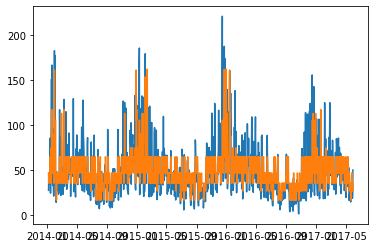

In [33]:
plt.plot(ObsvsPred)

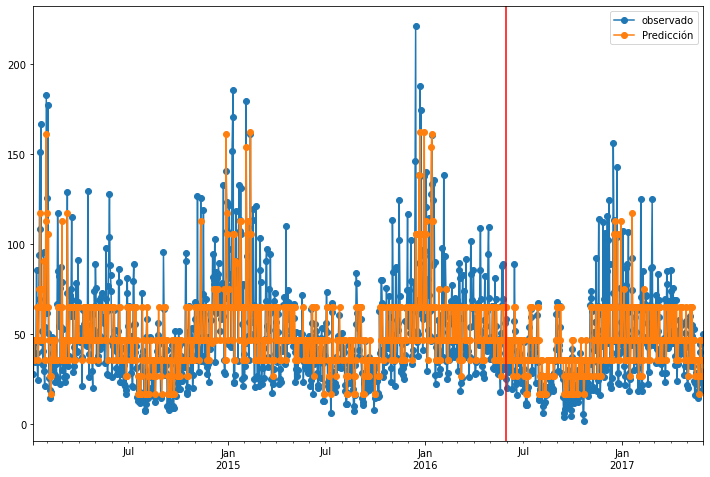

In [34]:

ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[876].date(),color='red')